### Author: Allan Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Data Science Student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@proton.me
### Date Started: 2025-03-21 
### Last Updated: 20215-04-02 09:25

# 1.0 Introduction

In this project, we step into the role of analysts tasked with predicting whether a customer will leave Beta Bank. The bank is facing a gradual loss of customers, which is eroding its client base month by month. Recognizing that retaining existing customers is more cost-effective than acquiring new ones, the bank has provided data on clients’ historical behavior and contract terminations.

Our objective is to build a predictive model with an F1 score of at least 0.59 and evaluate its performance on a test set. Additionally, we will measure the AUC-ROC metric and compare it with the F1 score to gain deeper insights into the model's effectiveness.

Workflow Path:
1. **Data Import and Overview**: We will begin by importing the dataset and conducting a preliminary exploration.
2. **Data Cleaning and Preprocessing**: Next, we will clean the data, standardize column names, and address any inconsistencies or redundancies.
3. **Exploratory Data Analysis (EDA)**: We will analyze the data to uncover patterns and relationships that may influence customer behavior.
4. **Class Imbalance Analysis**: Since the dataset is imbalanced, we will examine the distribution of classes and train an initial model without addressing the imbalance to establish a baseline.
5. **Model Improvement**: To enhance the model's performance, we will employ at least two techniques to address class imbalance. Using the training set, we will fine-tune parameters, train multiple models, and select the best-performing one.
6. **Final Testing**: Finally, we will evaluate the chosen model on the test set and summarize our findings.

### 1.1 Data Import & Overview
First let's import the necessary libraries and modules for this project, then import the data. To get an overview of what we're working with, let's look at the first five rows of the data, print the shape, and print the data types. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, PrecisionRecallDisplay,precision_score, r2_score, recall_score, roc_curve, roc_auc_score  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
import seaborn as sns

df = pd.read_csv('Churn.csv') 
display(df.head()) 
print(f'rows, columns:\n{df.shape}\n')
print(f'Data types:\n{df.dtypes}')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


rows, columns:
(10000, 14)

Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# 1.2 Data Description
Here is a description of all of the columns: 

Features:   
- RowNumber — data string index  
- CustomerId — unique customer identifier  
- Surname — surname  
- CreditScore — credit score  
- Geography — country of residence  
- sex — sex  
- Age — age  
- Tenure — period of maturation for a customer’s fixed deposit (years)  
- Balance — account balance  
- NumOfProducts — number of banking products used by the customer  
- HasCrCard — customer has a credit card  
- IsActiveMember — customer’s activeness  
- EstimatedSalary — estimated salary

Target:  
- Exited — сustomer has left

# 2.0 Preprocessing & EDA
Let's begin by cleaning the data. The column names are currently capitalized, and multi-word names are concatenated, which violates the PEP8 Style Guide. We'll standardize these names for better readability. Additionally, the 'RowNumber' and 'surname' columns are redundant for our analysis—'RowNumber' is unnecessary since DataFrames already have indices, and 'surname' provides no meaningful insights. We'll drop these columns to streamline the dataset.

### 2.1 Preprocessing

In [2]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'creditscore': 'credit_score', 
                        'numofproducts': 'num_of_products', 
                        'hascrcard': 'has_credit_card', 
                        'isactivemember': 'is_active_member', 
                        'estimatedsalary': 'estimated_salary'}) 
df = df.reset_index(drop=True)
display(df.head())

,rownumber,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(['customerid', 'rownumber', 'surname'], axis= 1)

Let's check for NaNs and duplicates.

In [4]:
print(f'NaNs:\n{df.isna().sum()}\n')
print(f'NaNs percentage:\n{df.isna().sum()/df.shape[0]*100}\n')

NaNs:
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_credit_card       0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

NaNs percentage:
credit_score        0.00
geography           0.00
gender              0.00
age                 0.00
tenure              9.09
balance             0.00
num_of_products     0.00
has_credit_card     0.00
is_active_member    0.00
estimated_salary    0.00
exited              0.00
dtype: float64



There are 909 NaNs in df['tenure'], which is 9.09% of the column's data. Perhaps let's use interpolation to fix this.

In [5]:
df.tenure = df.tenure.interpolate(method='linear', limit_direction='both')
print(f'NaNs:\n{df.isna().sum()}\n')

NaNs:
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_credit_card     0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64



In [6]:
df.dtypes

credit_score          int64
geography            object
gender               object
age                   int64
tenure              float64
balance             float64
num_of_products       int64
has_credit_card       int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [7]:
df.tenure = df.tenure.astype('int64')

Now that we've fixed that, let's check for duplicates.

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = pd.get_dummies(df, drop_first=True)
df = df.rename(columns={'geography_Germany': 'germany', 
                        'geography_Spain': 'spain', 
                        'gender_Male': 'sex'})
df.head()

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,germany,spain,sex
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


No duplicates, beautiful. We can now move on to the next step: EDA!

### 2.2 EDA Start


Since this project is centered on customers leaving, let's see how many have left. First let's look at our data again and then summate how many customers have left (df.exited == 1) and divide it by the total number of customers (df.shape), then multiply by 100 to obtain the percentage.

In [10]:
df.head()

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,germany,spain,sex
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
customer = df[df.exited == 0] 
former_customer = df[df.exited == 1]

print('Customers:')
display(customer.head())
print('Former Customers:')
display(former_customer.head())

Customers:


,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,germany,spain,sex
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
6,822,50,7,0.00,2,1,1,10062.80,0,False,False,True
8,501,44,4,142051.07,2,0,1,74940.50,0,False,False,True


Former Customers:


,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,germany,spain,sex
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
5,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True
7,376,29,4,115046.74,4,1,0,119346.88,1,True,False,False
16,653,58,1,132602.88,1,1,0,5097.67,1,True,False,True


In [12]:
exited_customers = (df.exited == 1).sum()/df.shape[0]*100
print(f'Exited customers percentage: {exited_customers}%')

Exited customers percentage: 20.369999999999997%


Text(0, 0.5, 'Count')

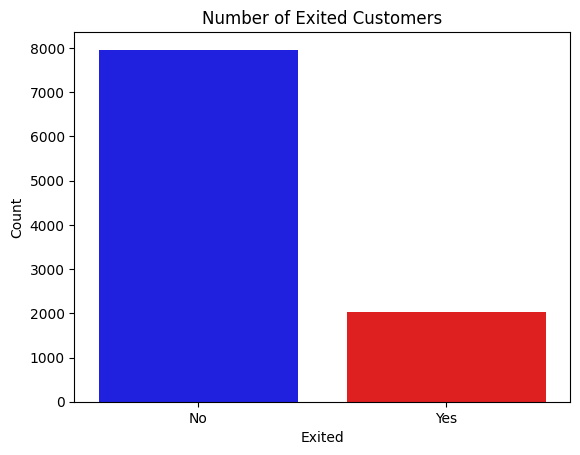

In [13]:
# Create the counts DataFrame
counts = df['exited'].value_counts().reset_index()
counts.columns = ['exited', 'count']
counts['exited'] = counts['exited'].replace({0: 'No', 1: 'Yes'})

# Plot the counts
sns.barplot(x= 'exited', 
            y= 'count', 
            data= counts, 
            palette= {'No': 'blue', 'Yes': 'red'}, 
            hue= 'exited')

plt.title('Number of Exited Customers') 
plt.xlabel('Exited')
plt.ylabel('Count')

20.37% of customers have left.

### 2.3 Credit Score 
Let's get a description of the population's 'credit_score', check if there's a correlation between 'credit_score' and 'exited', and then for visuals, create a histogram.

In [14]:
customer_credit_score_describe = customer.credit_score.describe()
former_customer_credit_score_describe = former_customer.credit_score.describe()

print("Description of Customers' Credit Score:")
print(customer_credit_score_describe, "\n")
print("Description of Former Customers' Credit Score:")
print(former_customer_credit_score_describe)

Description of Customers' Credit Score:
count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: credit_score, dtype: float64 

Description of Former Customers' Credit Score:
count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: credit_score, dtype: float64


In [15]:
df.exited.corr(df.credit_score)

np.float64(-0.02709353975465779)

<Axes: xlabel='credit_score', ylabel='Count'>

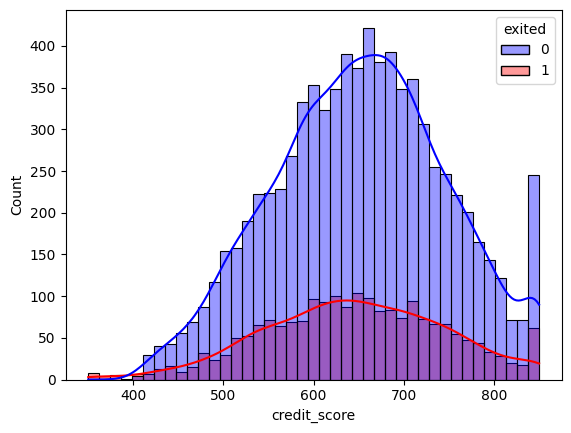

In [16]:
sns.histplot(data=df, 
             x= 'credit_score', 
             palette= {0: 'blue', 1: 'red'},
             hue= 'exited', 
             kde= True, 
             alpha= 0.4)

The description and graph do not seem to suggest a correlation between credit score and whether or not a customer stays.

### 2.4 Country
In this section, we analyze the distribution of customers across different countries and their exit statuses. First, we calculate the total population proportions for each country in the dataset. Then, we repeat this analysis for the `customer` and `former_customer` datasets to observe how the distribution changes between current and former customers. This helps us identify any country-specific trends or patterns that may influence customer retention.

In [17]:
countries = df.groupby(['germany', 'spain', 'exited']).size().reset_index(name='count')

countries['country'] = countries.apply(
    lambda row: 'Germany' if row['germany'] else ('Spain' if row['spain'] else 'France'), axis=1
)

In [18]:
country_counts = countries.groupby('country')['count'].sum()
print(f'Individuals by country: {country_counts}','\n')

proportions = country_counts / df.shape[0] * 100
print(f'Individuals by country (%): {proportions}')

Individuals by country: country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Individuals by country (%): country
France     50.14
Germany    25.09
Spain      24.77
Name: count, dtype: float64


In [19]:
customer_countries = customer.groupby(['germany', 'spain', 'exited']).size().reset_index(name= 'count')

customer_countries['country'] = customer_countries.apply(
    lambda row: 'Germany' if row['germany'] else ('Spain' if row['spain'] else 'France'), axis=1
)

customer_countries = customer_countries.groupby('country')['count'].sum() 
print(f'Customers by country: {customer_countries}') 

customer_countries_proportions = customer_countries / df.shape[0] * 100 
print(f'Customers by country (%): {customer_countries_proportions}')

Customers by country: country
France     4204
Germany    1695
Spain      2064
Name: count, dtype: int64
Customers by country (%): country
France     42.04
Germany    16.95
Spain      20.64
Name: count, dtype: float64


In [20]:
former_customer_country = former_customer.groupby(['germany', 'spain', 'exited']).size().reset_index(name='count')
former_customer_country['country'] = former_customer_country.apply(
    lambda row: 'Germany' if row['germany'] else ('Spain' if row['spain'] else 'France'), axis=1
)

former_customer_country = former_customer_country.groupby('country')['count'].sum()
print(f'Individuals by country: {former_customer_country}','\n')

former_customer_proportions = former_customer_country / df.shape[0] * 100
print(f'Individuals by country (%): {former_customer_proportions}')

Individuals by country: country
France     810
Germany    814
Spain      413
Name: count, dtype: int64 

Individuals by country (%): country
France     8.10
Germany    8.14
Spain      4.13
Name: count, dtype: float64


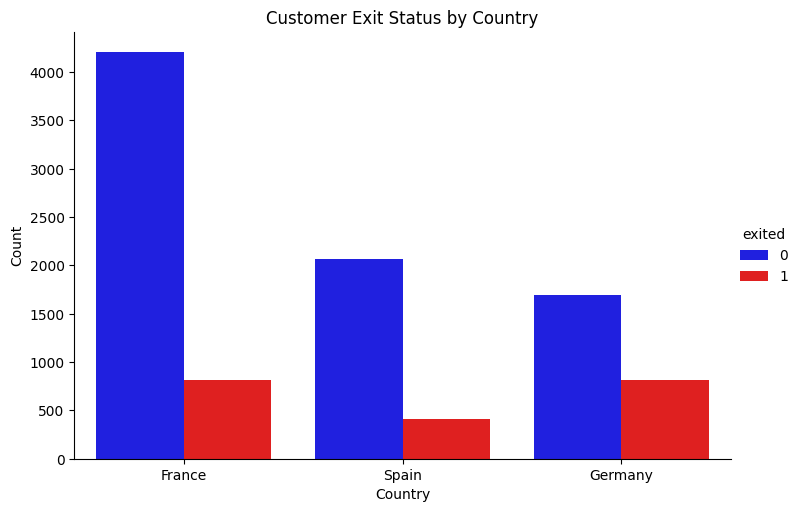

In [21]:
plot = sns.catplot(
    data=countries,
    x='country',
    y='count',
    hue='exited',
    kind='bar',
    palette={0: 'blue', 1: 'red'},
    height=5,
    aspect=1.5
)

plt.title('Customer Exit Status by Country')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()

In section 2.2 we established that an overall average of 20.37% of customers left Beta Bank. When we look at the averages by country, that changes. In France and Spain, 16.15% and 16.67% of customers left, but in Germany that figure is 32.44%. That's about twice as much as France and Spain, plus tnat's 1/3 of all German customers. Why is the exit rate so high in Germany?

### 2.5 Sex
In this section, we will analyze the distribution of customers by sex and their exit statuses. First we'll find the amount of males and females in the population, then repeat that step twice - once for the 'customer' dataset and again for the 'former_customer' dataset. By doing so, we'll find information 

In [22]:
sex_counts = df['sex'].value_counts()

print(f'Number of males: {sex_counts[True]}',
      '\n'f'Number of females: {sex_counts[False]}')
print(f'Number of males (percentage): {sex_counts[True]/(sex_counts[True] + sex_counts[False]) * 100}%',
      '\n'f'Number of females (percentage): {sex_counts[False]/(sex_counts[True] + sex_counts[False]) * 100}%')

Number of males: 5457 
Number of females: 4543
Number of males (percentage): 54.56999999999999% 
Number of females (percentage): 45.43%


In [23]:
customer_sex_count = customer.sex.value_counts()

print(f'Customer sex count:\n{customer_sex_count} \n')
print(f'Customer sex count (percentage):\n{customer_sex_count/customer.shape[0]*100}')

Customer sex count:
sex
True     4559
False    3404
Name: count, dtype: int64 

Customer sex count (percentage):
sex
True     57.252292
False    42.747708
Name: count, dtype: float64


In [24]:
former_customer_sex_count = former_customer.sex.value_counts()

print(f'Former customer sex count:\n{former_customer_sex_count} \n')
print(f'Former customer sex count (percentage):\n{former_customer_sex_count/former_customer.shape[0]*100} \n')

Former customer sex count:
sex
False    1139
True      898
Name: count, dtype: int64 

Former customer sex count (percentage):
sex
False    55.915562
True     44.084438
Name: count, dtype: float64 



Now let's get the percentages of remaining male and female customers. We'll create a barplot to visualize all of the information we've found and then summarize below.

In [25]:
male_not_exited = customer_sex_count[True]
total_males = male_not_exited + former_customer_sex_count[True]

percentage_male_not_exited = (male_not_exited / total_males) * 100
print(f'Percentage of remaining male customers: {percentage_male_not_exited}%')

female_not_exited = customer_sex_count[False] 
total_females = female_not_exited + former_customer_sex_count[False]

percentage_female_not_exited = (female_not_exited/ total_females) * 100
print(f'Percentage of remaining female customers: {percentage_female_not_exited}%')

Percentage of remaining male customers: 83.54407183434121%
Percentage of remaining female customers: 74.92846136913933%


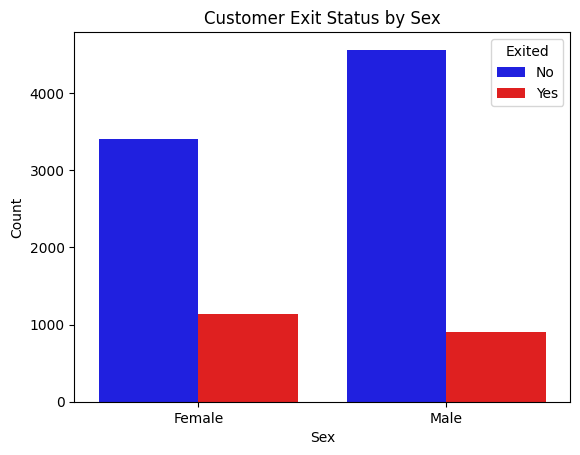

In [26]:
sex_exit_counts = df.groupby(['sex', 'exited']).size().reset_index(name='count')

sex_exit_counts['sex'] = sex_exit_counts['sex'].replace({True: 'Male', False: 'Female'})

sex_exit_counts['exited'] = sex_exit_counts['exited'].replace({1: 'Yes', 0: 'No'})

sns.barplot(data=sex_exit_counts, 
            x='sex', 
            y='count', 
            hue='exited', 
            palette={'No': 'blue', 'Yes': 'red'})

plt.title('Customer Exit Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Exited')
plt.show()

Let's recall these percentages from earlier:

All individuals in the dataset by sex:  
- Male: 54.57% (5457)  
- Female: 45.43% (4543)  
- Difference: -9.14 %  

Customers by sex:  
- Male: 57.25% (4559)  
- Female: 42.75% (3404)  
- Difference: -14.5%

Former Customers by sex:  
- Male: 44.08% (898)  
- Female: 55.92% (1139)  
- Difference: +11.84%  

Remaining customer percentage of each category:  
- Male: 83.54%  
- Female: 74.83%  
- Difference: -8.17%

Within the overall dataset, there are 9.14% more males than females. The calculations suggest a 14.5% difference between customers' sexes, with male customers being the majority. Conversely for formers customers, females are the majority and have an 11.84% difference. Finally, males showed a tendency to stay - only 16.46% left compared to 25.17% for females. That's an 8.71% difference. 

### 2.6 Age
In this section, we'll examine whether age influences individuals exiting the bank. To do this, let's first get a description of the column and check for a correlation between the two.

In [27]:
customer_age_describe = customer.age.describe()
former_customer_age_describe = former_customer.age.describe()

print("Description of Customers' Age:")
print(customer_age_describe)
print()
print("Description of Former Customers' Age:")
print(former_customer_age_describe)

Description of Customers' Age:
count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: age, dtype: float64

Description of Former Customers' Age:
count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: age, dtype: float64


In [28]:
df.exited.corr(df.age)

np.float64(0.2853230378350683)

Text(0.5, 0, 'Age')

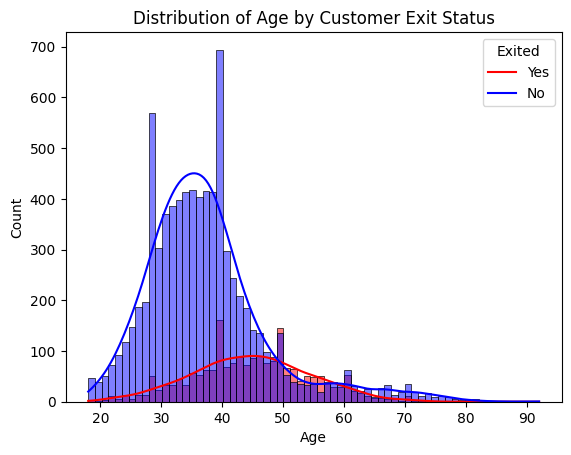

In [29]:
ax = sns.histplot(data= df, 
                  x= 'age', 
                  palette= {0: 'blue', 1: 'red'}, 
                  hue= 'exited', 
                  hue_order= [0, 1], 
                  kde= True)
legend = ax.legend(labels= ['Yes', 'No'])
legend.set_title('Exited')

plt.title('Distribution of Age by Customer Exit Status')
plt.xlabel('Age')

The age desciption and histogram seem to indicate that former customers tend to be older than those who are still customers.

### 2.7 Tenure
Let's examine our target against customers' tenures. First let's describe customer and former customer tenure, then check for correlation.

In [30]:
customer_tenure_describe = customer.tenure.describe()
former_customer_tenure_describe = former_customer.tenure.describe()

print(f'Customer tenure:\n{customer_tenure_describe}\n')
print(f'Former Customer tenure:\n{former_customer_tenure_describe}\n')

Customer tenure:
count    7963.000000
mean        4.998744
std         2.817081
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

Former Customer tenure:
count    2037.000000
mean        4.879234
std         2.878882
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64



In [31]:
df.exited.corr(df.tenure)

np.float64(-0.017008531887356036)

In [32]:
df.groupby('tenure')['exited'].sum()

tenure
0      91
1     227
2     202
3     221
4     211
5     225
6     206
7     176
8     186
9     200
10     92
Name: exited, dtype: int64

In [33]:
customer.groupby('tenure')['exited'].sum()

tenure
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: exited, dtype: int64

Text(1.8209861111111127, 0.5, 'Count')

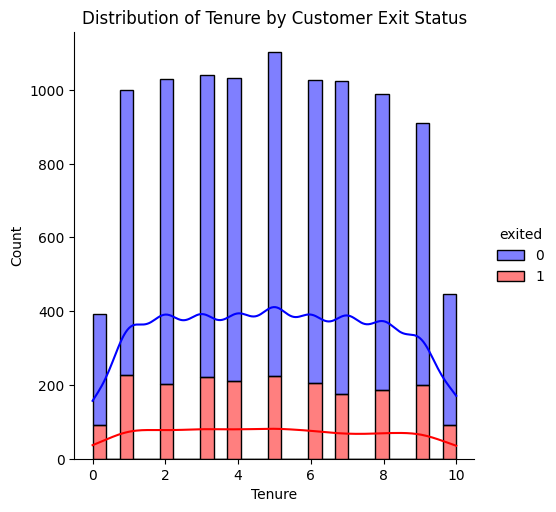

In [34]:
sns.displot(data=df, 
            x= 'tenure', 
            hue= 'exited', 
            palette= {0: 'blue', 1: 'red'}, 
            multiple= 'stack', 
            kde= True) 

plt.title('Distribution of Tenure by Customer Exit Status')
plt.xlabel('Tenure')
plt.ylabel('Count')

It doesn't seem like tenure has an impact on whether a customer exits.

### 2.8 Account Balance

In [35]:
print("Description of Customers' Balances:")
print(customer.balance.describe())
print()
print("Description of Former Customers' Balances:")
print(former_customer.balance.describe())

Description of Customers' Balances:
count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: balance, dtype: float64

Description of Former Customers' Balances:
count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: balance, dtype: float64


In [36]:
df.exited.corr(df.balance)

np.float64(0.11853276877163371)

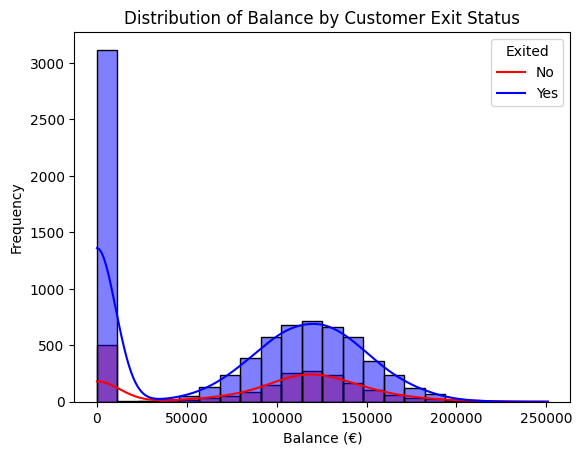

In [37]:
sns.histplot(data=df, 
             x='balance', 
             hue='exited', 
             palette={0: 'blue', 1: 'red'}, 
             kde=True)

plt.title('Distribution of Balance by Customer Exit Status')
plt.xlabel('Balance (€)')
plt.ylabel('Frequency') 
plt.legend(title='Exited', labels=['No', 'Yes'])

### 2.9 Number of Products

In [38]:
print("Description of the Number of Products that Customers Use:")
print(customer.num_of_products.describe())
print()
print("Description of the Number of Products that Former Customers Used:") 
print(former_customer.num_of_products.describe())

Description of the Number of Products that Customers Use:
count    7963.000000
mean        1.544267
std         0.509536
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: num_of_products, dtype: float64

Description of the Number of Products that Former Customers Used:
count    2037.000000
mean        1.475209
std         0.801521
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: num_of_products, dtype: float64


In [39]:
df.exited.corr(df.num_of_products)

np.float64(-0.04781986494944054)

<Axes: xlabel='num_of_products', ylabel='Count'>

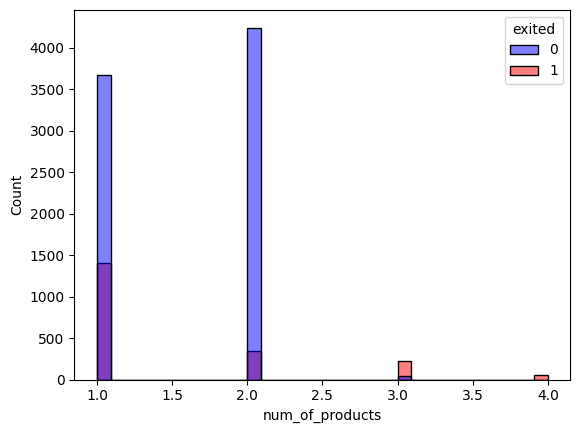

In [40]:
sns.histplot(data= df, 
            x= 'num_of_products', 
            hue= 'exited', 
            palette= {0: 'blue', 1: 'red'})

### 2.10 Credit Card

In [41]:
print('Customers who have credit cards:')
print(customer.has_credit_card.value_counts(),
      '\n',
      customer.has_credit_card.value_counts()[0] / customer.shape[0] * 100,'% do not have credit cards')
print()
print('Former customers who have credit cards:')
print(former_customer.has_credit_card.value_counts(),
      '\n',
      former_customer.has_credit_card.value_counts()[0] / former_customer.shape[0] * 100,'% do not have credit cards')

Customers who have credit cards:
has_credit_card
1    5631
0    2332
Name: count, dtype: int64 
 29.285445183975888 % do not have credit cards

Former customers who have credit cards:
has_credit_card
1    1424
0     613
Name: count, dtype: int64 
 30.09327442317133 % do not have credit cards


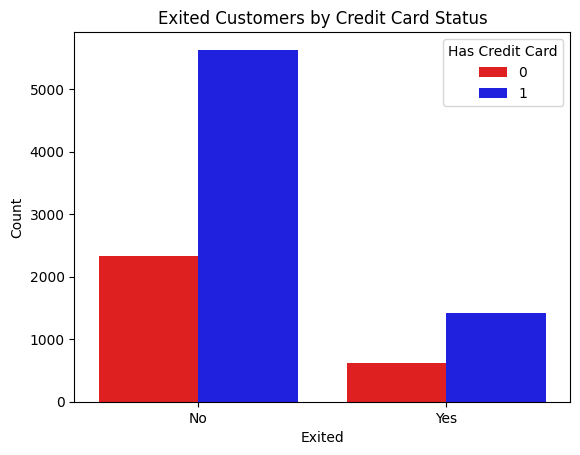

In [42]:
df_has_credit_card = df.groupby(['exited', 'has_credit_card']).size().reset_index(name='count') 

sns.barplot(data= df_has_credit_card, 
            x= 'exited', 
            y= 'count', 
            hue= 'has_credit_card', 
            palette= {1: 'blue', 0: 'red'})

plt.title('Exited Customers by Credit Card Status')
plt.xlabel('Exited') 
plt.ylabel('Count') 
plt.xticks(ticks= [0, 1], labels= ['No', 'Yes']) 
plt.legend(title='Has Credit Card')

The ratio of individuals who don't have credit cards between customers and former customers is nearly identical, which suggests that having a credit card does not affect whether or not a customer leaves.

### 2.11 Active Members

In [43]:
print('Customers who are active members:')
print(customer.is_active_member.value_counts(),
      '\n',
      customer.is_active_member.value_counts()[0] / customer.shape[0] * 100,'% are not active members')
print()
print('Former customers who are active members:')
print(former_customer.is_active_member.value_counts(),
      '\n',
      former_customer.is_active_member.value_counts()[0] / former_customer.shape[0] * 100,'% are not active members')

Customers who are active members:
is_active_member
1    4416
0    3547
Name: count, dtype: int64 
 44.543513751098835 % are not active members

Former customers who are active members:
is_active_member
0    1302
1     735
Name: count, dtype: int64 
 63.91752577319587 % are not active members


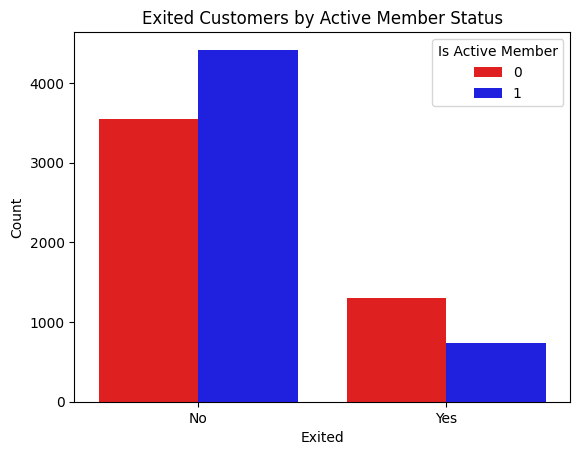

In [44]:
df_is_active = df.groupby(['exited', 'is_active_member']).size().reset_index(name='count') 

sns.barplot(data= df_is_active, 
            x= 'exited', 
            y= 'count', 
            hue= 'is_active_member', 
            palette= {1: 'blue', 0: 'red'})

plt.title('Exited Customers by Active Member Status')
plt.xlabel('Exited') 
plt.ylabel('Count') 
plt.xticks(ticks= [0, 1], labels= ['No', 'Yes']) 
plt.legend(title='Is Active Member')

In [45]:
df.head()

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,germany,spain,sex
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### 2.12 Estimated Salary 

In [46]:
print('Description of customers\' estimated salaries:')
print(customer.estimated_salary.describe(), '\n')
print('Description of former customers\' estimated salaries:')
print(former_customer.estimated_salary.describe())

Description of customers' estimated salaries:
count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: estimated_salary, dtype: float64 

Description of former customers' estimated salaries:
count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: estimated_salary, dtype: float64


In [47]:
df.exited.corr(df.estimated_salary)

np.float64(0.01209686102684467)

Text(0, 0.5, 'Frequency')

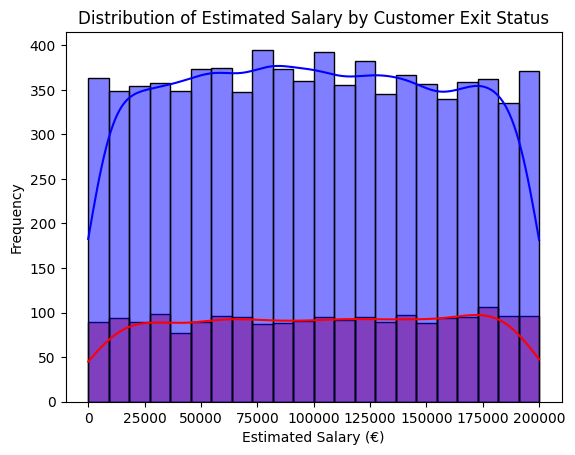

In [48]:
sns.histplot(data= df, 
             x= 'estimated_salary', 
             hue= 'exited', 
             palette= {0: 'blue', 1: 'red'}, 
             kde= True, 
             legend= False, 
             alpha= 0.5)

plt.title('Distribution of Estimated Salary by Customer Exit Status')
plt.xlabel('Estimated Salary (€)') 
plt.ylabel('Frequency')

There seems to be a relatively even dispersion of estimated salaries between both current and former customers. Nothing suggests that this feature has an impact on customer exit status.

### 2.13 EDA Conclusion 
Overall, country, age, and customer activity seem to impact whether or not customers leave. Country seems to have the strongest influence - specifically Germany where the exit rate is twice as high as the other two countries in the data (France and Spain).

# 3.0 Model 
Recall in subsection 2.2, we found that 20.37% of customers have left. As this constitutes the lesser of the two classes, this is our minority group. First let's train a model without taking into account class imbalance and briefly describe what we find from that. After that, we'll improve the quality of the model by using two approaches to addressing class imbalance. Based on our findings, we'll choose the better of the two and then perform a final testing.

### 3.1 Unbalanced Classes

In [49]:
features = df.drop('exited', axis= 1)
target= df.exited
features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, 
                                                                              target, 
                                                                              test_size= 0.2, 
                                                                              random_state= 12345) 

features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, 
                                                                              target_train_valid, 
                                                                              test_size= 0.25, 
                                                                              random_state= 12345) 


In [50]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


#### Performance Metrics 
Accuracy, precision, recall, and F1-score are commonly used performance metrics to evaluate the effectiveness of a classification model. These metrics provide insights into different aspects of the model’s performance in predicting class labels.[1]

[1] machinelearning.org.in (2024, October 3). *Accuracy, precision, recall, and F1-score*. Machine Learning Tutorials, Courses and Certifications, paragraph 1. https://machinelearning.org.in/accuracy-precision-recall-and-f1-score/ 

In [51]:
logreg_model = LogisticRegression(solver= 'liblinear', random_state= 12345) 
logreg_model.fit(features, target) 
predicted_valid = logreg_model.predict(features_valid)
accuracy = accuracy_score(target_valid, predicted_valid)

print(f'Accuracy: {accuracy}')
print('F1:', f1_score(target_valid, predicted_valid))

Accuracy: 0.7965
F1: 0.13588110403397027


In [52]:
matrix = confusion_matrix(target_valid, predicted_valid)
matrix

array([[1561,   48],
       [ 359,   32]])

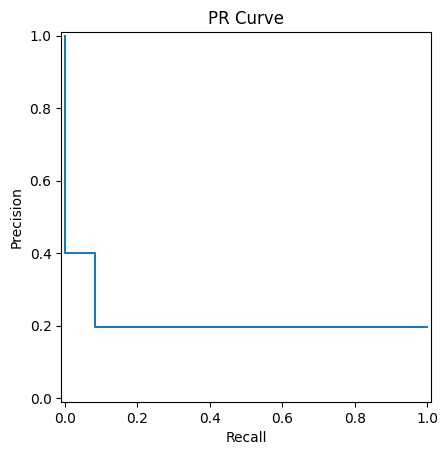

In [53]:
precision, recall, _ = precision_recall_curve(target_valid, predicted_valid)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.title('PR Curve')
plt.show()

In [54]:
probabilities_valid = logreg_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'AUC-ROC score: {auc_roc}')

AUC-ROC score: 0.6912301170366815


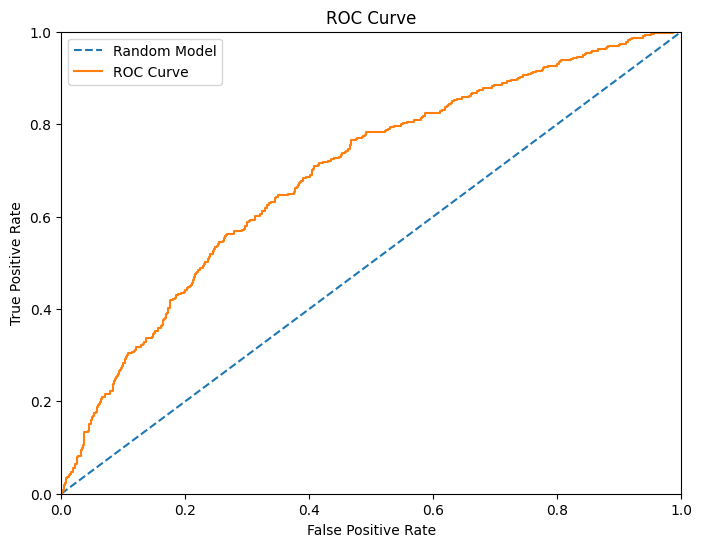

In [55]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 3.2 Upsampled

In [56]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, 
                                                   target_upsampled, 
                                                   random_state=12345)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(features_train, 
                                                target_train, 
                                                4)

features_upsampled.shape,target_upsampled.shape

((9657, 11), (9657,))

In [57]:
ranfor_model = RandomForestClassifier(n_estimators= 120, 
                                      random_state= 12345) 
ranfor_model.fit(features_upsampled, 
                     target_upsampled)
ranfor_predict = ranfor_model.predict(features_valid)
f1_score(target_valid,ranfor_predict)

0.5938375350140056

In [58]:
matrix = confusion_matrix(target_valid, ranfor_predict)
matrix

array([[1498,  111],
       [ 179,  212]])

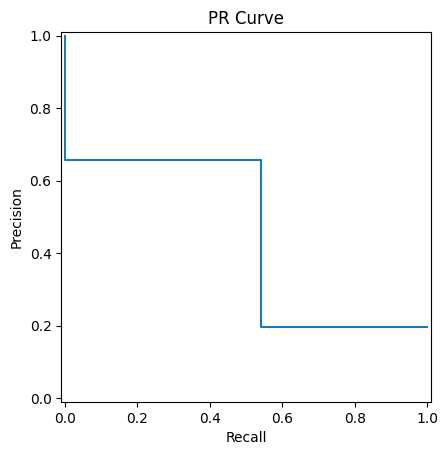

In [59]:
precision, recall, _ = precision_recall_curve(target_valid, ranfor_predict)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.title('PR Curve')
plt.show()

In [60]:
probabilities_valid = ranfor_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)



auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'AUC-ROC score: {auc_roc}')

AUC-ROC score: 0.8428771027420886


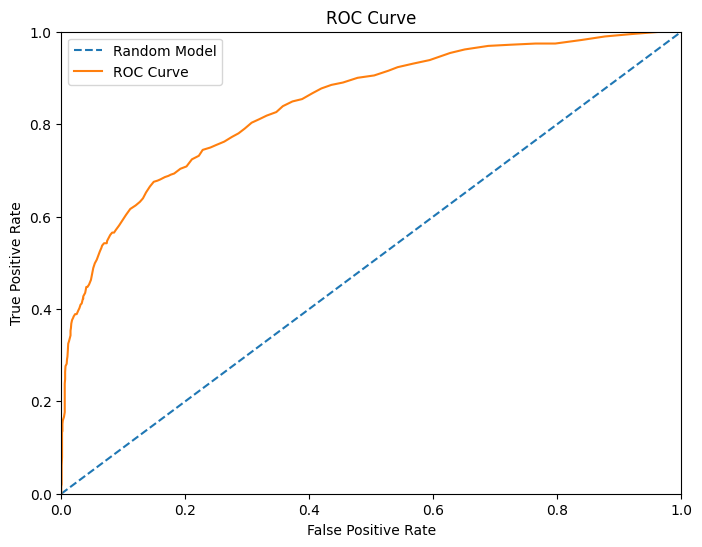

In [61]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 3.3 Downsampled

In [62]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.2
)

features_downsampled.shape,target_downsampled.shape


((2175, 11), (2175,))

In [63]:
best_depth = 0
best_f1 = 0

for depth in range(1, 21): 
    dectree_model = DecisionTreeClassifier(random_state=12345, 
                                           max_depth=depth)
    dectree_model.fit(features_train, 
                      target_train) 
    
    predicted_valid = dectree_model.predict(features_valid)
    accuracy = accuracy_score(target_valid, 
                              predicted_valid)
    f1_dectree = f1_score(target_valid, 
                          predicted_valid)
    
    print(f"max_depth = {depth}: Accuracy: {accuracy}, F1: {f1_dectree}")
    
    if f1_dectree > best_f1:
        best_f1 = f1_dectree
        best_depth = depth

print(f"\nBest max_depth: {best_depth} with F1: {best_f1}")

max_depth = 1: Accuracy: 0.8045, F1: 0.0
max_depth = 2: Accuracy: 0.8325, F1: 0.5037037037037037
max_depth = 3: Accuracy: 0.843, F1: 0.3938223938223938
max_depth = 4: Accuracy: 0.8495, F1: 0.4331450094161959
max_depth = 5: Accuracy: 0.855, F1: 0.5510835913312694
max_depth = 6: Accuracy: 0.86, F1: 0.5138888888888888
max_depth = 7: Accuracy: 0.859, F1: 0.5579937304075235
max_depth = 8: Accuracy: 0.85, F1: 0.5412844036697247
max_depth = 9: Accuracy: 0.844, F1: 0.5343283582089552
max_depth = 10: Accuracy: 0.8395, F1: 0.5341074020319303
max_depth = 11: Accuracy: 0.8335, F1: 0.5180897250361794
max_depth = 12: Accuracy: 0.8275, F1: 0.5035971223021583
max_depth = 13: Accuracy: 0.815, F1: 0.4931506849315068
max_depth = 14: Accuracy: 0.8125, F1: 0.4993324432576769
max_depth = 15: Accuracy: 0.814, F1: 0.5013404825737265
max_depth = 16: Accuracy: 0.8085, F1: 0.4993464052287582
max_depth = 17: Accuracy: 0.803, F1: 0.4909560723514212
max_depth = 18: Accuracy: 0.7985, F1: 0.48792884371029227
max_dept

In [64]:
matrix_dectree = confusion_matrix(target_valid, predicted_valid)
matrix_dectree

array([[1395,  214],
       [ 200,  191]])

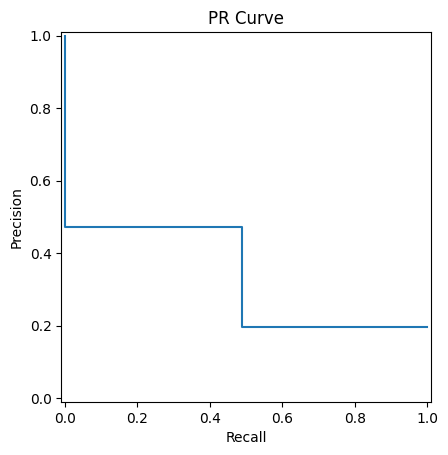

In [65]:
precision_dectree, recall_dectree, _ = precision_recall_curve(target_valid, predicted_valid)
disp = PrecisionRecallDisplay(precision= precision_dectree, recall= recall_dectree)
disp.plot()

plt.title('PR Curve')
plt.show()

In [66]:
probabilities_dectree = dectree_model.predict_proba(features_valid)
probabilities_one_dectree = probabilities_dectree[:, 1]

dectree_fpr, dectree_tpr, dectree_thresholds = roc_curve(target_valid, probabilities_one_dectree)

auc_roc = roc_auc_score(target_valid, probabilities_one_dectree)

print(f'AUC-ROC score: {auc_roc}')

AUC-ROC score: 0.6830901625924507


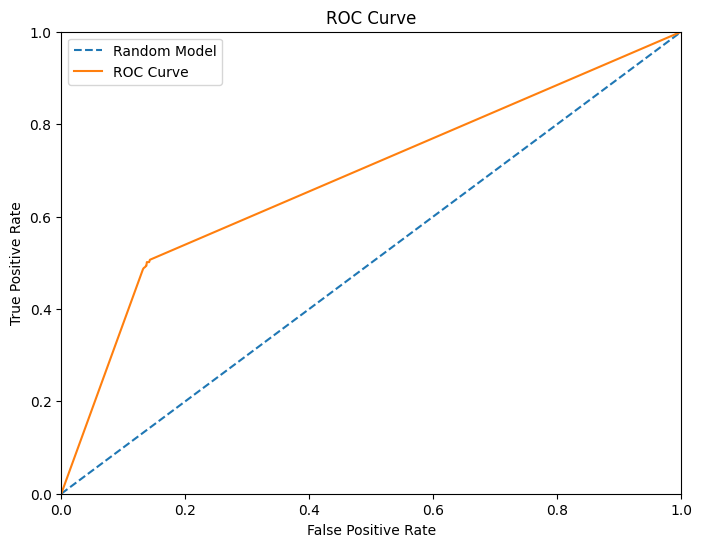

In [67]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')
plt.plot(dectree_fpr, dectree_tpr, label='ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 4.0 Testing

In [68]:
features_full = pd.concat([features_train,features_valid])
target_full =  pd.concat([target_train,target_valid])


test_model = RandomForestClassifier(n_estimators= 81, 
                                    random_state= 12345)
test_model = test_model.fit(features_test, target_test)

predicted_test = test_model.predict(features_test)
test_accuracy = accuracy_score(target_test, predicted_test)

print(f'Accuracy: {test_accuracy}')
print('F1:', f1_score(target_test, predicted_test))

Accuracy: 1.0
F1: 1.0


In [69]:
test_matrix = confusion_matrix(target_test, predicted_test) 
test_matrix

array([[1573,    0],
       [   0,  427]])

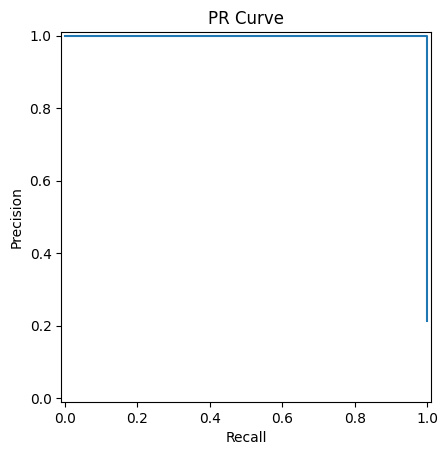

In [70]:
test_precision, test_recall, _ = precision_recall_curve(target_test, predicted_test)
disp = PrecisionRecallDisplay(precision=test_precision, recall=test_recall)
disp.plot()

plt.title('PR Curve')
plt.show()

In [71]:
test_probabilities = logreg_model.predict_proba(features_valid)
test_probabilities_one = test_probabilities[:, 1]

test_fpr, test_tpr, test_thresholds = roc_curve(target_test, test_probabilities_one)

auc_roc = roc_auc_score(target_test, test_probabilities_one)

print(f'AUC-ROC score: {auc_roc}')

AUC-ROC score: 0.5018498639959147


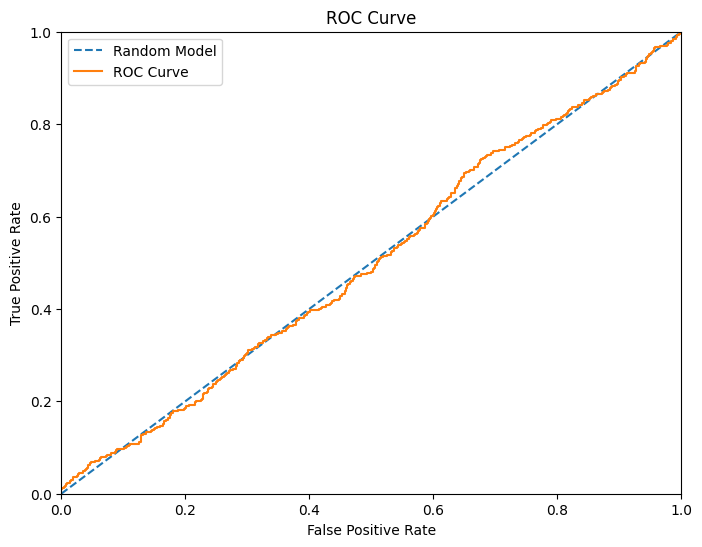

In [72]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')
plt.plot(test_fpr, test_tpr, label='ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()